# Loading libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Train data

In [2]:
train = pd.read_csv("C:/Saurabh/My phone/datasets/Used car data/train-data.csv")
train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
train.describe(include = 'all')

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
count,6019.000000,6019,6019,6019.000000,6.019000e+03,6019,6019,6019,6017,5983,5983,5977.000000,824,6019.000000
unique,NaN,1876,11,NaN,NaN,5,2,4,442,146,372,NaN,540,NaN
top,NaN,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp,NaN,4.78 Lakh,NaN
freq,NaN,49,790,NaN,NaN,3205,4299,4929,172,606,235,NaN,6,NaN
mean,3009.000000,NaN,NaN,2013.358199,5.873838e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.278735,NaN,9.479468
std,1737.679967,NaN,NaN,3.269742,9.126884e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.808840,NaN,11.187917
min,0.000000,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.440000
25%,1504.500000,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,3.500000
50%,3009.000000,NaN,NaN,2014.000000,5.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,5.640000
75%,4513.500000,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,9.950000


In [4]:
train.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

Removing unnecessory columns. Since we already have Index and there are alot of missing values in 'New_Price' column, we will remove both from the table. 

In [5]:
train = train.drop(['Unnamed: 0', 'New_Price'], axis = 1)

In [6]:
train.shape

(6019, 12)

There are some missing values in data which are removable so we will drop them.

In [7]:
df_no_mv = train.dropna()

In [8]:
df_no_mv.shape

(5975, 12)

# Test data

In [9]:
test = pd.read_csv("C:/Saurabh/My phone/datasets/Used car data/test-data.csv")
test.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [10]:
test.shape

(1234, 13)

In [11]:
test.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

Removing unnecessory columns and dropping the rows with missing values.

In [12]:
test = test.drop(['Unnamed: 0','New_Price'], axis = 1)

In [13]:
test = test.dropna()

## Data cleaing

In [14]:
df_no_mv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 606.8+ KB


1. Splitting the alphanumeric values into just number.
2. Splitting the Name of car into the main brand and model.

In [15]:
df_no_mv[['milege','unit_1']]=df_no_mv['Mileage'].str.split(" ", n=1, expand = True)

C:\Users\Saurabh\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [16]:
df_no_mv[['engine', 'unit_2']] = df_no_mv['Engine'].str.split(" ", expand = True)

In [17]:
df_no_mv[['power', 'unit_3']] = df_no_mv['Power'].str.split(" ", expand=True)

In [18]:
df_no_mv[['brand', 'model']] = df_no_mv['Name'].str.split(" ", n=1, expand=True)

Dropping the unnecessary columns.

In [19]:
data_1 = df_no_mv.drop(['Power', 'unit_3', 'Engine', 'unit_2', 'Mileage', 'unit_1',\
                        'Name'], axis = 1)

In [20]:
data_1.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Seats', 'Price', 'milege', 'engine', 'power', 'brand',
       'model'],
      dtype='object')

Keeping the columns in an order so that it will be easy to see.

In [21]:
df= data_1[['Price','Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type',\
            'brand','model','Kilometers_Driven','Seats', 'milege', 'engine', 'power']]

After splitting the alphanumeric values into numbers we found that ther are some cells which are supposed to be null values but are filled with 'null' in string format, which makes them not null so we will be replacing them with 'average value of power'.

In [22]:
df[df['power']=='null']

,Price,Location,Year,Fuel_Type,Transmission,Owner_Type,brand,model,Kilometers_Driven,Seats,milege,engine,power
76,2.00,Jaipur,2008,Diesel,Manual,First,Ford,Fiesta 1.4 SXi TDCi,111111,5.0,17.8,1399,null
79,1.30,Hyderabad,2005,Petrol,Manual,First,Hyundai,Santro Xing XL,87591,5.0,0.0,1086,null
89,2.10,Hyderabad,2007,Petrol,Manual,First,Hyundai,Santro Xing XO,73745,5.0,17.0,1086,null
120,0.85,Mumbai,2005,Petrol,Manual,Second,Hyundai,Santro Xing XL eRLX Euro III,102000,5.0,17.0,1086,null
143,1.67,Kochi,2008,Petrol,Manual,Third,Hyundai,Santro Xing XO eRLX Euro II,80759,5.0,17.0,1086,null
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5861,1.85,Chennai,2007,Petrol,Manual,First,Hyundai,Santro Xing XO,79000,5.0,17.0,1086,null
5873,1.20,Pune,2006,Petrol,Manual,Second,Hyundai,Santro Xing XO eRLX Euro II,47200,5.0,17.0,1086,null
5925,2.85,Pune,2010,Petrol,Manual,First,Skoda,Laura Classic 1.8 TSI,85000,5.0,17.5,1798,null
5943,1.70,Chennai,2002,Diesel,Manual,First,Mahindra,Jeep MM 540 DP,75000,6.0,0.0,2112,null


In [23]:
df['power'] = df['power'].replace(to_replace='null', value=0)

In [24]:
df['power'] = df['power'].astype(float)

In [25]:
df['power'] = df['power'].replace(to_replace=0, value=df['power'].mean())

In [26]:
df1=df.copy()

In [27]:
df1.shape

(5975, 13)

Since these numbers are stil in string format since they have been just splitted from string format, we will have to convert them into respective float or int type.

In [28]:
df1['milege'] = df1['milege'].astype(float)

In [29]:
df1['engine'] = df1['engine'].astype(int)

In [30]:
df1.head()

,Price,Location,Year,Fuel_Type,Transmission,Owner_Type,brand,model,Kilometers_Driven,Seats,milege,engine,power
0,1.75,Mumbai,2010,CNG,Manual,First,Maruti,Wagon R LXI CNG,72000,5.0,26.60,998,58.16
1,12.50,Pune,2015,Diesel,Manual,First,Hyundai,Creta 1.6 CRDi SX Option,41000,5.0,19.67,1582,126.20
2,4.50,Chennai,2011,Petrol,Manual,First,Honda,Jazz V,46000,5.0,18.20,1199,88.70
3,6.00,Chennai,2012,Diesel,Manual,First,Maruti,Ertiga VDI,87000,7.0,20.77,1248,88.76
4,17.74,Coimbatore,2013,Diesel,Automatic,Second,Audi,A4 New 2.0 TDI Multitronic,40670,5.0,15.20,1968,140.80


In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Price              5975 non-null   float64
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Fuel_Type          5975 non-null   object 
 4   Transmission       5975 non-null   object 
 5   Owner_Type         5975 non-null   object 
 6   brand              5975 non-null   object 
 7   model              5975 non-null   object 
 8   Kilometers_Driven  5975 non-null   int64  
 9   Seats              5975 non-null   float64
 10  milege             5975 non-null   float64
 11  engine             5975 non-null   int32  
 12  power              5975 non-null   float64
dtypes: float64(4), int32(1), int64(2), object(6)
memory usage: 630.2+ KB


# EDA

## Price

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

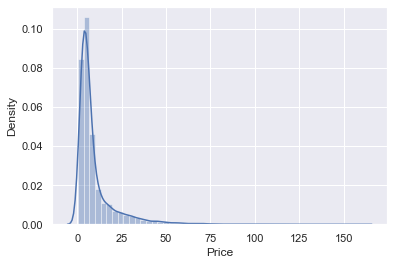

In [32]:
sns.distplot(df1['Price'])

So there are some outliers

In [33]:
q = df1['Price'].quantile(0.99)
df2 = df1[df1['Price']<q]
df2.describe(include='all')

,Price,Location,Year,Fuel_Type,Transmission,Owner_Type,brand,model,Kilometers_Driven,Seats,milege,engine,power
count,5915.000000,5915,5915.000000,5915,5915,5915,5915,5915,5915.000000,5915.000000,5915.000000,5915.000000,5915.000000
unique,NaN,11,NaN,4,2,4,29,1828,NaN,NaN,NaN,NaN,NaN
top,NaN,Mumbai,NaN,Diesel,Manual,First,Maruti,XUV500 W8 2WD,NaN,NaN,NaN,NaN,NaN
freq,NaN,778,NaN,3147,4266,4849,1197,49,NaN,NaN,NaN,NaN,NaN
mean,8.876680,NaN,2013.358242,NaN,NaN,NaN,NaN,NaN,57865.586306,5.282333,18.228661,1605.674894,111.472377
std,9.221092,NaN,3.242219,NaN,NaN,NaN,NaN,NaN,37931.653468,0.801219,4.508759,576.230678,50.085272
min,0.440000,NaN,1998.000000,NaN,NaN,NaN,NaN,NaN,171.000000,0.000000,0.000000,624.000000,34.200000
25%,3.500000,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,34007.500000,5.000000,15.290000,1197.000000,75.940000
50%,5.570000,NaN,2014.000000,NaN,NaN,NaN,NaN,NaN,53293.000000,5.000000,18.200000,1468.000000,98.600000
75%,9.660000,NaN,2016.000000,NaN,NaN,NaN,NaN,NaN,73000.000000,5.000000,21.100000,1968.000000,138.000000


In [34]:
print(df2.shape)

(5915, 13)


In [35]:
df2=df2.drop('model', axis=1)
df2.head()

,Price,Location,Year,Fuel_Type,Transmission,Owner_Type,brand,Kilometers_Driven,Seats,milege,engine,power
0,1.75,Mumbai,2010,CNG,Manual,First,Maruti,72000,5.0,26.60,998,58.16
1,12.50,Pune,2015,Diesel,Manual,First,Hyundai,41000,5.0,19.67,1582,126.20
2,4.50,Chennai,2011,Petrol,Manual,First,Honda,46000,5.0,18.20,1199,88.70
3,6.00,Chennai,2012,Diesel,Manual,First,Maruti,87000,7.0,20.77,1248,88.76
4,17.74,Coimbatore,2013,Diesel,Automatic,Second,Audi,40670,5.0,15.20,1968,140.80


C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

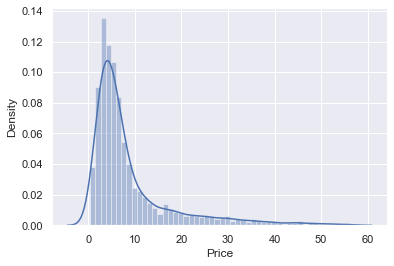

In [36]:
sns.distplot(df2['Price'])

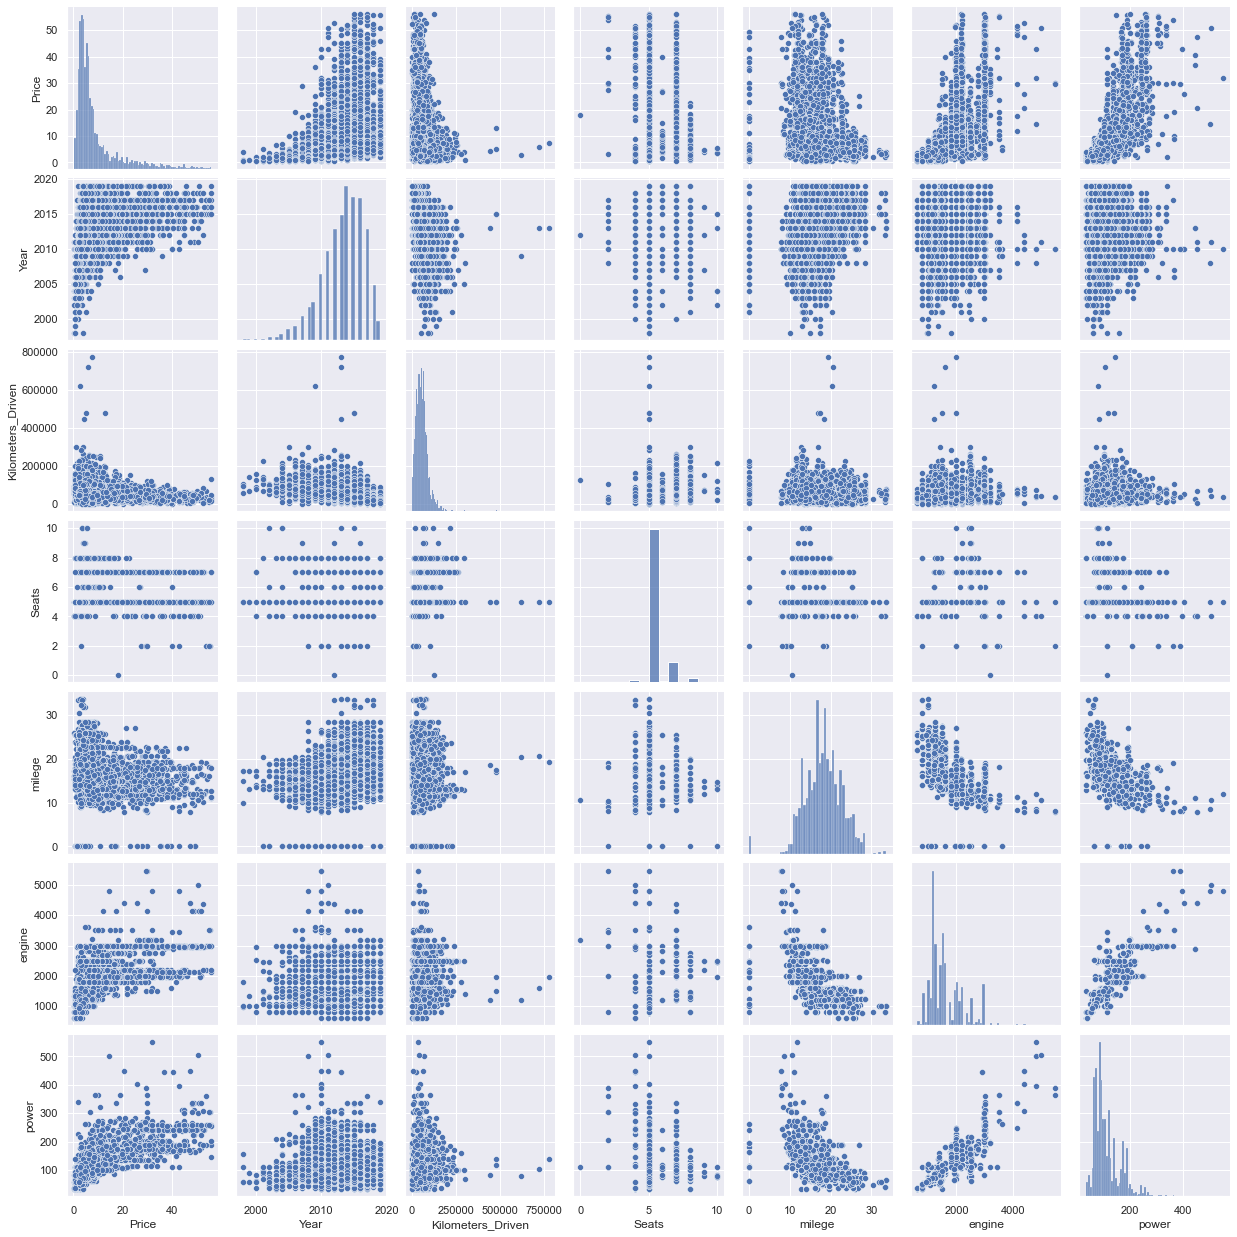

In [37]:
sns.pairplot(df2)

## Location vs price

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Location', ylabel='Price'>

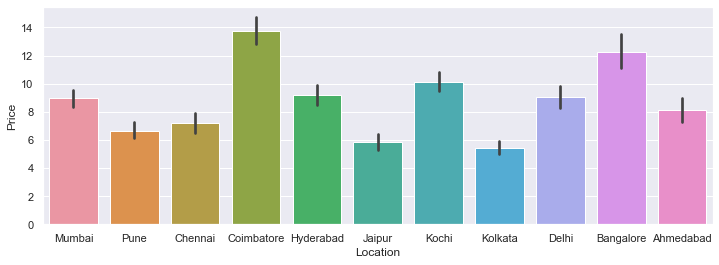

In [38]:
fig = plt.figure(figsize=[12,4])
sns.barplot(df2['Location'], df2['Price'])

<AxesSubplot:xlabel='Location', ylabel='Price'>

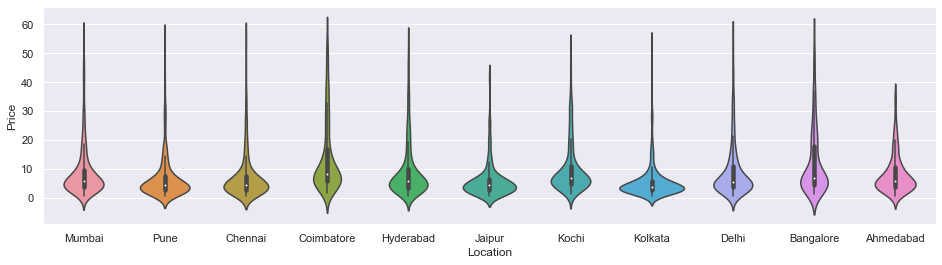

In [39]:
fig=plt.figure(figsize=[16,4])
sns.violinplot(y=df2['Price'], x=df2['Location'])

This is the distribution of car's price in every City.
1. As you can see there no city where perticular cars are sold more than other.
2. Almost every city has same distribution.

## Fuel_Type vs Price

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

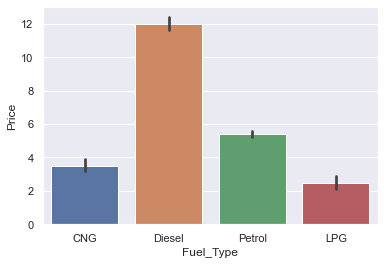

In [40]:
sns.barplot(df2['Fuel_Type'], df2['Price'])

1. As we can see Diesel and Petrol cars are the most expensive one since mostly sports car or the luxury cars have these 2 types of fuel.
2. And manufaturing CNG and LPG is far less expensive than Diesel and petrol.

## Transmission vs price

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Transmission', ylabel='Price'>

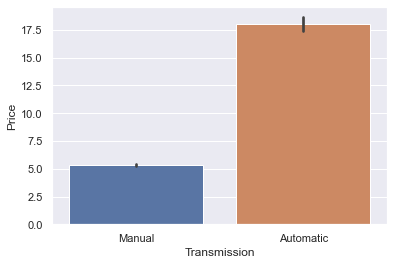

In [41]:
sns.barplot(df2['Transmission'], df2['Price'])

Automatic cars are more expensive than manual

<AxesSubplot:xlabel='Transmission', ylabel='Price'>

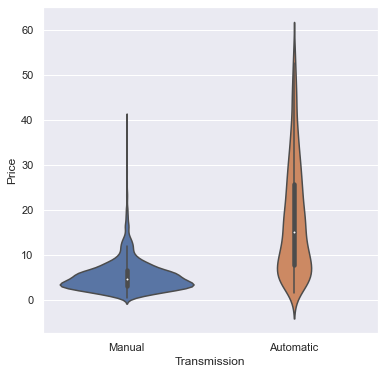

In [42]:
fig=plt.figure(figsize=[6,6])
sns.violinplot(y=df2['Price'], x=df2['Transmission'])

Manual cars are more likely to fall in one perticular range, not like Automatic cars.

### Fuel type vs price with transmission

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

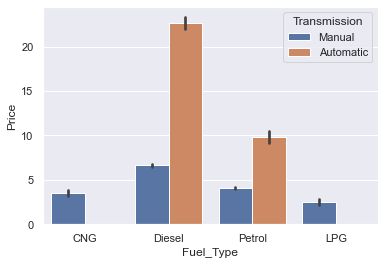

In [43]:
sns.barplot('Fuel_Type', 'Price', data=df2, hue='Transmission')

Most luxury/sports cars are automatic hence we can see the price dinamic.

## Owner_Type vs Price

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Owner_Type', ylabel='Price'>

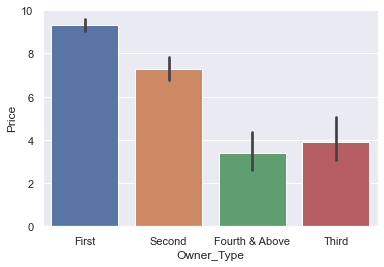

In [44]:
sns.barplot(df2['Owner_Type'], df2['Price'])

This is obvious that more used the car less its price is gonna be.

## Km driven vs Price

<AxesSubplot:xlabel='Price', ylabel='Kilometers_Driven'>

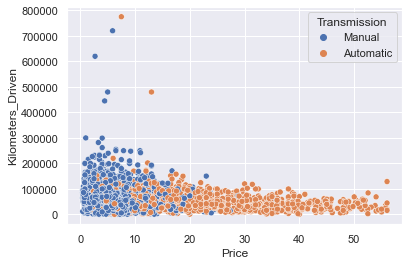

In [45]:
sns.scatterplot(y='Kilometers_Driven', x='Price', data = df2, hue='Transmission')

1. More kms it is driven more used it is which already makes it excluded from ‘First owner’ category from ‘Owner type’, therefore most of cars are less expensive in the graph.
2. Automatic cars with same kms driven as manual are expensive as they are most likely to be luxury/sports car or SUVs.
3. There are 2 automatic cars which are cheap as compared to other automatic cars since they have been driven a lot.


## Year vs price

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='Price'>

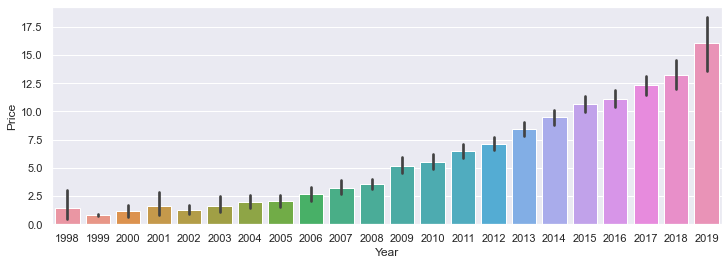

In [46]:
fig = plt.figure(figsize=[12,4])
sns.barplot(df2['Year'], df2['Price'])

This is also obvious that newer the car expensive it is going to be.

In [47]:
df2.groupby('brand').Price.agg(['mean','count' ]).sort_values(by='mean')

,mean,count
brand,,
Ambassador,1.350000,1
Smart,3.000000,1
Chevrolet,3.044463,121
Datsun,3.049231,13
Fiat,3.340800,25
Tata,3.562849,186
Maruti,4.538730,1197
Nissan,4.738352,91
Volkswagen,5.307270,315


## Seats vs Price

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Seats', ylabel='Price'>

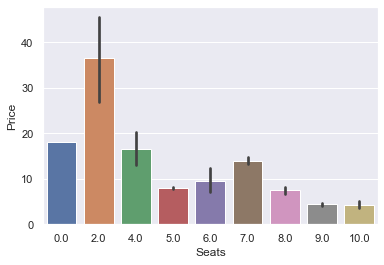

In [48]:
sns.barplot(df2['Seats'], df2['Price'])

In [49]:
df1[df1['Seats']==10]

,Price,Location,Year,Fuel_Type,Transmission,Owner_Type,brand,model,Kilometers_Driven,Seats,milege,engine,power
814,3.50,Pune,2004,Diesel,Manual,Second,Toyota,Qualis FS B2,77757,10.0,13.10,2446,75.000000
917,5.25,Mumbai,2013,Diesel,Manual,First,Tata,Sumo DX,20000,10.0,14.07,1978,83.100000
1907,3.65,Bangalore,2002,Diesel,Manual,Third,Toyota,Qualis FS B3,63000,10.0,13.10,2446,75.000000
2267,3.50,Pune,2004,Diesel,Manual,Second,Toyota,Qualis RS E2,215750,10.0,0.00,2446,111.324171
2575,5.50,Hyderabad,2015,Diesel,Manual,First,Chevrolet,Tavera LS B3 10 Seats BSIII,120000,10.0,14.80,2499,80.000000


1. Most luxury/sports car which are expensive have 2 seats ony.
2. Other cars which are till 6-7 seaters are medium priced.
3. And vehicals which have more than 7 seats are truck so they are usually cheap.

### Relation between engine, power and milege

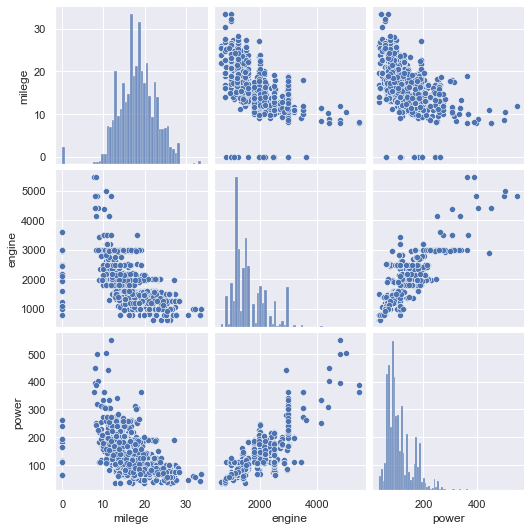

In [50]:
sns.pairplot(df2[['milege', 'engine', 'power']])

In [51]:
len(df2[df2['milege']==0])

56

In [52]:
df3 = df2[df2['milege']>0]

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='milege', ylabel='power'>

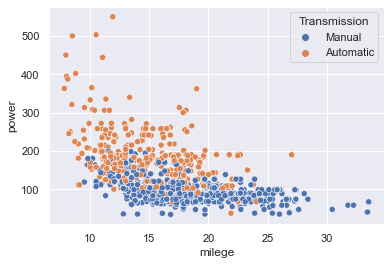

In [53]:
sns.scatterplot('milege', 'power', data=df3, hue='Transmission')

1. higher the power more milege the car has.
2. automatic cars are more likely to have higher power and little milege.

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='milege', ylabel='engine'>

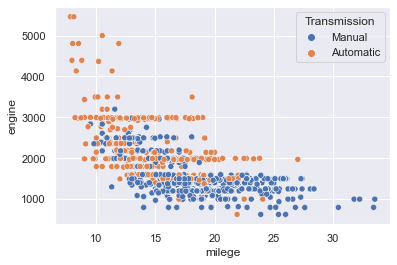

In [54]:
sns.scatterplot('milege', 'engine', data=df3, hue='Transmission')

1. Heavier the engine lesser the milege.
2. automatic cars are more likely to have heavier engine.

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='engine', ylabel='power'>

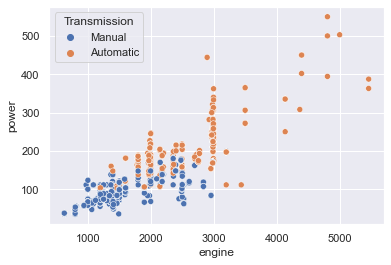

In [55]:
sns.scatterplot('engine', 'power', data=df3, hue='Transmission')

1. heavier the engine higher the power.
2. higher power cars with heavy engines are usually luxury cars.

## Price against power, milege and engine.

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='power', ylabel='Price'>

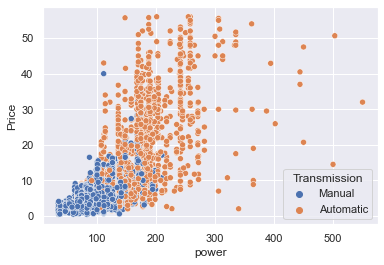

In [56]:
sns.scatterplot('power', 'Price', data=df3, hue='Transmission')

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='engine', ylabel='Price'>

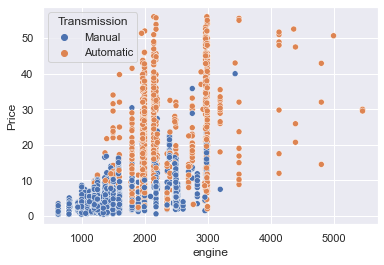

In [57]:
sns.scatterplot('engine', 'Price', data=df3, hue='Transmission')

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='milege', ylabel='Price'>

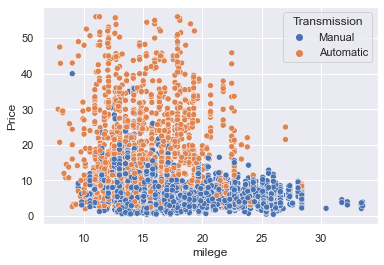

In [58]:
sns.scatterplot('milege', 'Price', data=df3, hue='Transmission')

So this concludes expensive cars mostly automamtic and most automatic cars are luxury cars which have higher power, heavier engine and less milege.

In [59]:
train.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')